In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [6]:
df=pd.read_csv("/home/intellect/Documents/Supervised_Capstone/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("First few rows:\n",df.head())

First few rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [10]:
print("Dataset Information:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print("Statistical Function:\n",df.describe())

Statistical Function:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [11]:
df.drop(columns=['customerID'],inplace=True)

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

/tmp/ipykernel_41113/3586155465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [14]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [15]:
le=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=le.fit_transform(df[col])

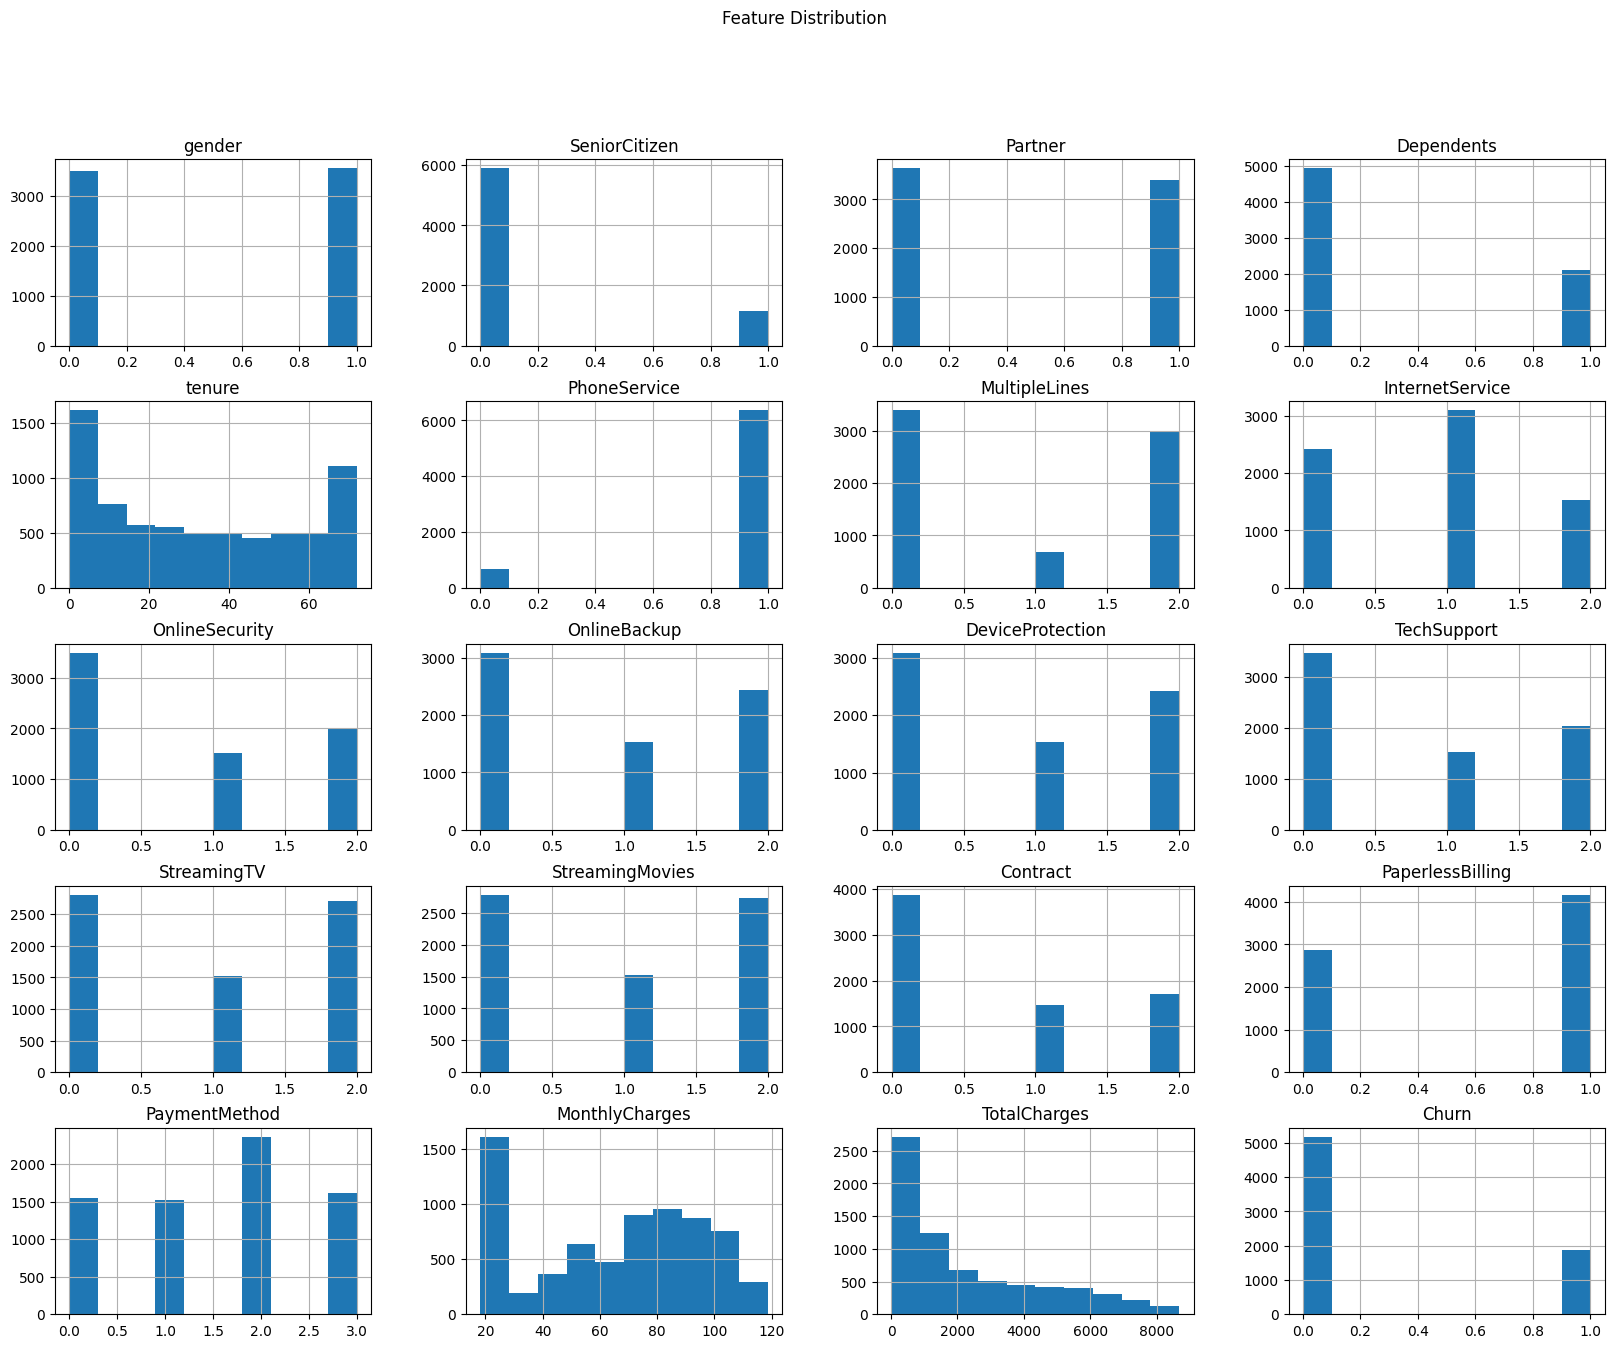

In [16]:
df.hist(figsize=(20,15))
plt.suptitle("Feature Distribution")
plt.show()

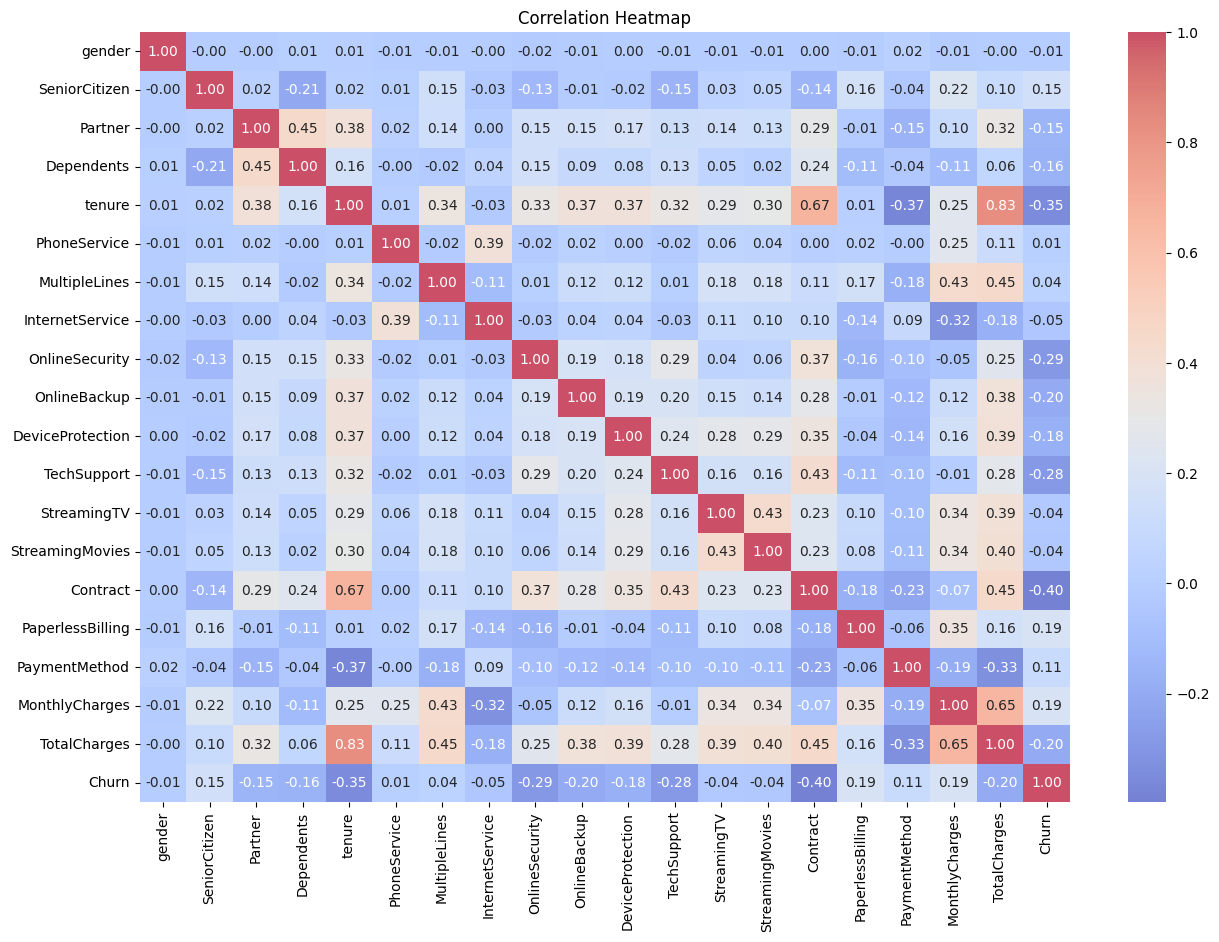

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt=".2f",alpha=0.7)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
clf_models = {
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Decision Tree":DecisionTreeClassifier(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "Random Forest":RandomForestClassifier()
}
clf_results = {}

for name,model in clf_models.items():
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    clf_results[name]=accuracy_score(y_test,pred)

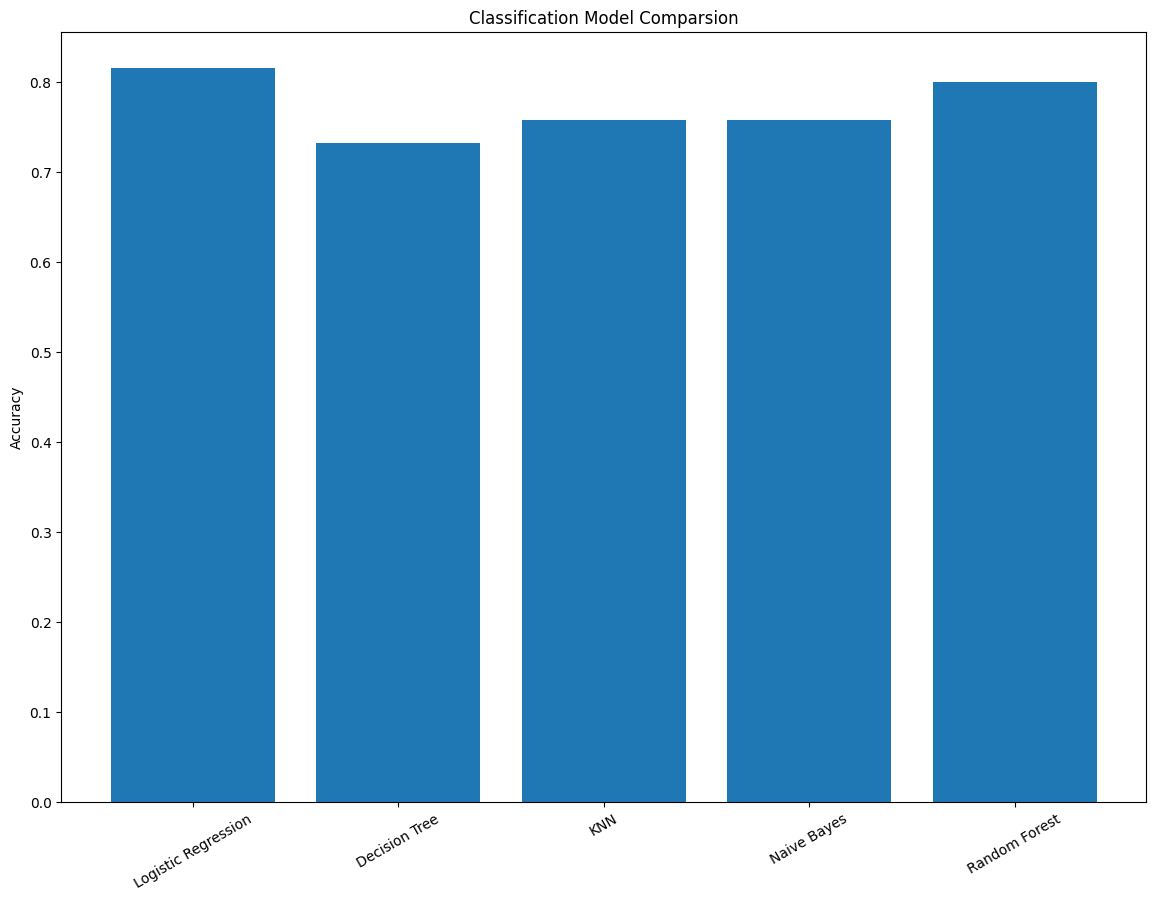

In [26]:
plt.figure(figsize=(14,10))
plt.bar(clf_results.keys(),clf_results.values())
plt.ylabel("Accuracy")
plt.title("Classification Model Comparsion")
plt.xticks(rotation=30)
plt.show()

In [27]:
best_clf=RandomForestClassifier()
best_clf.fit(x_train,y_train)
y_pred=best_clf.predict(x_test)
print("Classification report:\n",classification_report(y_test,pred))

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [29]:
x_reg=df.drop('MonthlyCharges',axis=1)
y_reg=df['MonthlyCharges']

In [30]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_reg,y_reg,test_size=0.2,random_state=42)

In [31]:
scaler_reg=StandardScaler()
xr_train=scaler_reg.fit_transform(xr_train)
xr_test=scaler_reg.transform(xr_test)

In [33]:
reg_models = {
    "Linear Regression":LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNN Regressor":KNeighborsRegressor(),
    "Random Forest Regressor":RandomForestRegressor()
}
reg_result = {}

for name,model in reg_models.items():
    model.fit(xr_train,yr_train)
    pred=model.predict(xr_test)
    reg_result[name]=r2_score(yr_test,pred)

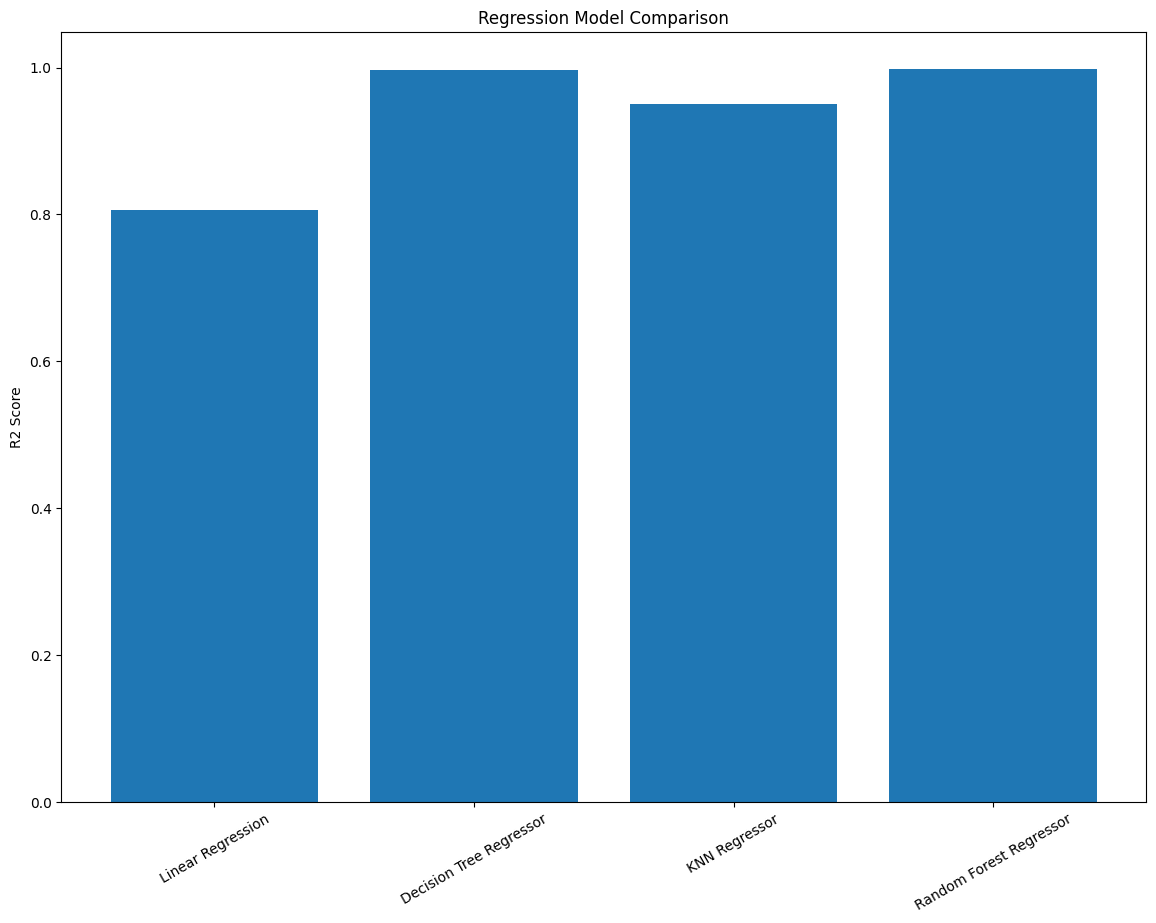

In [35]:
plt.figure(figsize=(14,10))
plt.bar(reg_result.keys(),reg_result.values())
plt.ylabel("R2 Score")
plt.title("Regression Model Comparison")
plt.xticks(rotation=30)
plt.show()

In [36]:
best_reg=RandomForestRegressor()
best_reg.fit(xr_train,yr_train)
yr_pred=best_reg.predict(xr_test)
print("MAE:",mean_absolute_error(yr_test,yr_pred))
print("MSE:",mean_squared_error(yr_test,yr_pred))
print("R2 Score:",r2_score(yr_test,yr_pred))

MAE: 0.9159077359829655
MSE: 1.6438827168204375
R2 Score: 0.9981843066119476


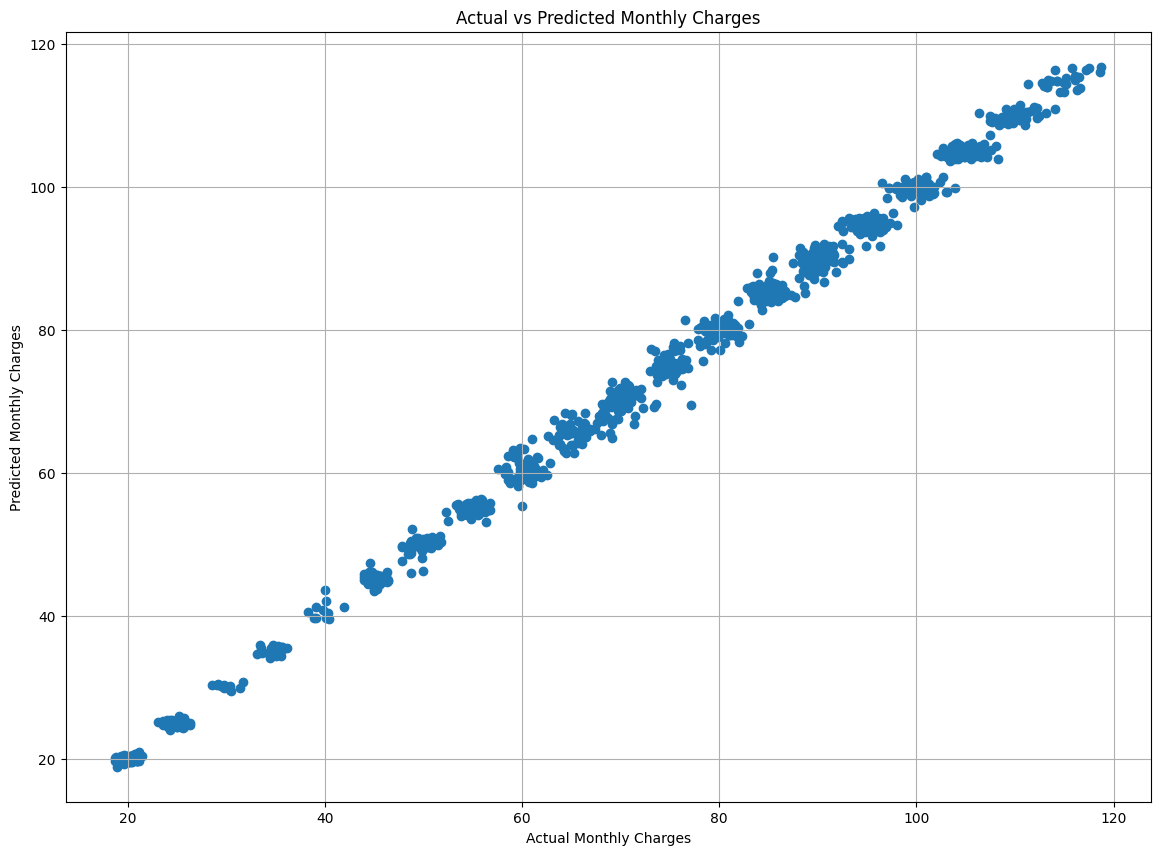

In [38]:
plt.figure(figsize=(14,10))
plt.scatter(yr_test,yr_pred)
plt.xlabel("Actual Monthly Charges")
plt.ylabel("Predicted Monthly Charges")
plt.title("Actual vs Predicted Monthly Charges")
plt.grid()
plt.show()

In [39]:
import joblib
joblib.dump(best_clf, "churn_classification_model.pkl")
joblib.dump(scaler, "classification_scaler.pkl")

['classification_scaler.pkl']

In [40]:
joblib.dump(best_reg, "monthly_charges_regression_model.pkl")
joblib.dump(scaler_reg, "regression_scaler.pkl")

['regression_scaler.pkl']